In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from P3_helpers import *

In [2]:
df = get_dataframe()
df

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1.0,2013.0,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1.0,2013.0,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1.0,2013.0,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1.0,2013.0,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1.0,2003.0,2003-09-02 02:51:00,Support
198271,Angela,WhisperToMe,1,1.0,2003.0,2003-11-26 23:45:00,Support.
198272,Jiang,WhisperToMe,1,1.0,2003.0,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1.0,2003.0,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....


In [7]:
df[df.Target == 'TenPoundHammer'].Comment

52229     '''Conditional support''' - 7 RFAs means nothi...
52230     '''Support''' Seen him around. A preliminary c...
52231     '''Support''', much as it seems academic at th...
52232     '''Extra strong uber Support''' It's a crime t...
52233     '''Support''' Lucky number seven? What occurs ...
                                ...                        
123577    '''Neutral, suggest withdrawal''' - Seriously,...
123578    '''Neutral teetering on the brink of support''...
123579    '''Neutral''' I was '''oppose''' last time, an...
123580    '''Neutral''' I was support last time around a...
123581    '''Friendly neutral''' much per New England an...
Name: Comment, Length: 775, dtype: object

# Time series visualisation

### Handle missing data

In [4]:
voting_time = (df.groupby('Target').Date.apply(lambda x: x - x.min()).dt.total_seconds()/3600).rename('Voting_time')

# add voting time to df dataframe, merge on index
df_timeserie = df.join(voting_time.droplevel(0))
df_timeserie

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.,0.000000
1,Cuchullain,BDD,1,1.0,2013.0,2013-04-20 01:04:00,'''Support''' as nominator.--,1.850000
2,INeverCry,BDD,1,1.0,2013.0,2013-04-19 23:43:00,'''Support''' per noms.,0.500000
3,Cncmaster,BDD,1,1.0,2013.0,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,0.966667
4,Miniapolis,BDD,1,1.0,2013.0,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1.716667
...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1.0,2003.0,2003-09-02 02:51:00,Support,48.633333
198271,Angela,WhisperToMe,1,1.0,2003.0,2003-11-26 23:45:00,Support.,0.000000
198272,Jiang,WhisperToMe,1,1.0,2003.0,NaT,Support. --,NaN
198273,Pakaran,WhisperToMe,1,1.0,2003.0,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....,197.883333


The voting_time series gives the time in minute at which each vote was cast compared to the first vote recorded for the same target (we consider this as the opening of the polls). Thus, for each target we should have a voting_time of 0.

In [5]:
# Convert Vote, Results and Year to int
df_timeserie['Vote'] = df_timeserie['Vote'].astype(int)
df_timeserie['Results'] = df_timeserie['Results'].astype(int)
df_timeserie['Year'] = df_timeserie['Year'].astype(int)

In [6]:
# Plot basic statistics
df_timeserie['Voting_time'].describe().round(2)

count    187998.00
mean       1924.74
std        5943.52
min           0.00
25%          10.50
50%          46.80
75%         157.97
max       72598.02
Name: Voting_time, dtype: float64

In [7]:
# Targets where all voting times are NaN
nan_target = set(df_timeserie.Target.unique()) - set(df_timeserie[~df_timeserie['Voting_time'].isna()].Target.unique())
print('Number of target without time data:', len(nan_target), ', corresponding to', round(len(nan_target)/len(df_timeserie.Target.unique())*100, 2), '% of all targets')
print('Target without time data:', nan_target)

# Amount of NaN values in the voting time column
print('Number of NaN values in the voting time column:', df_timeserie['Voting_time'].isna().sum(), ', corresponding to', round(df_timeserie['Voting_time'].isna().sum()/len(df_timeserie)*100, 2), '% of all values')

Number of target without time data: 23 , corresponding to 0.66 % of all targets
Target without time data: {'Chadloder', 'J.J.', 'Vsmith', 'Feco', 'Schneelocke', 'Delirium', 'Noel', 'Fantasy', 'CYD', 'Jdforrester', 'Woohookitty', 'Starblind', 'Talrias', 'Cyan', 'Mintguy', 'Tompagenet', 'wavelab1', 'Dori', 'Craigy144', 'RickK', 'Olivier', 'Zanimum', 'Bishonen'}
Number of NaN values in the voting time column: 7649 , corresponding to 3.91 % of all values


In [8]:
# Remove NaN values in the voting time column
df_timeserie = df_timeserie[~df_timeserie['Voting_time'].isna()]

## Distribution of the voting time

In [9]:
warnings.filterwarnings('ignore')

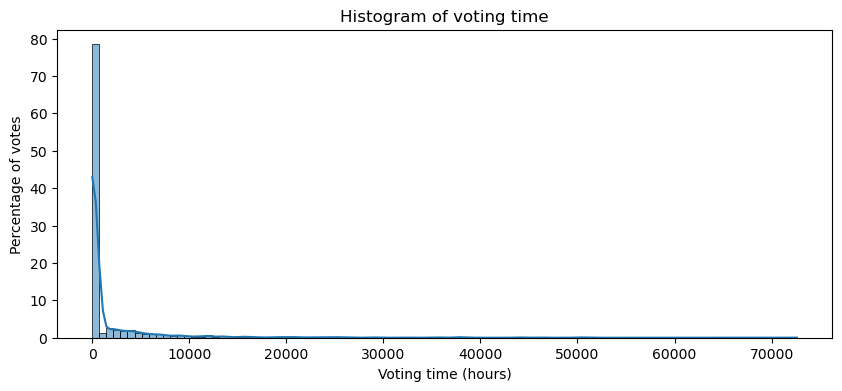

In [10]:
# Plot histogram of voting time
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(data=df_timeserie, x='Voting_time', kde=True, ax=ax, bins=100, stat='percent')
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

In [11]:
# Remove the vote at time 0 minute, to plot the histogram of voting time
df_plot = df_timeserie[df_timeserie.Voting_time != 0]

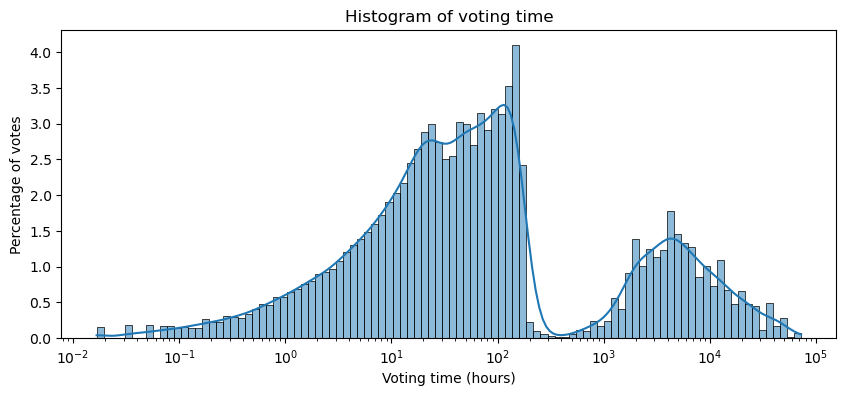

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
kde = sns.histplot(data=df_plot, x='Voting_time',kde=True, ax=ax, bins=100, stat='percent', log_scale=(True, False))
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

#### Plot distribution in function of time

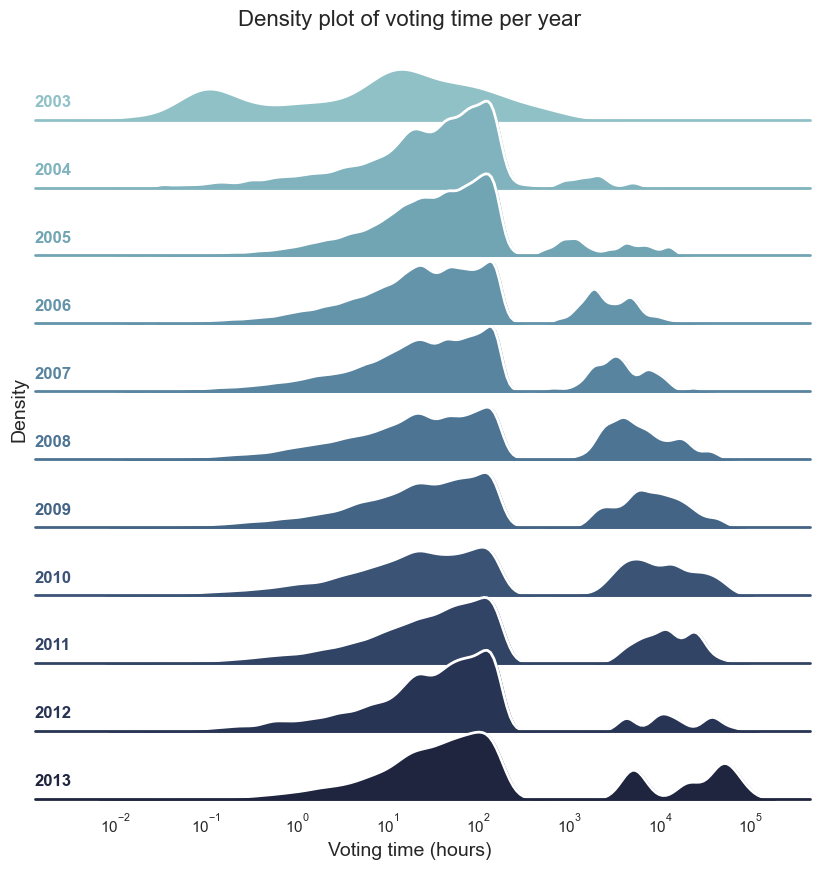

In [13]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(11, rot=-.25, light=.7)
g = sns.FacetGrid(df_plot, row='Year', hue='Year', aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'Voting_time', bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5, log_scale=(True, False))
g.map(sns.kdeplot, 'Voting_time', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .2, label, fontweight="bold", color=color,
                  ha="left", va="center", transform=ax.transAxes)

g.map(label, 'Voting_time')

# Set figure properties
#g.fig.set_tight_layout(True)
g.fig.subplots_adjust(hspace=-.25)
g.fig.set_figwidth(10)
g.fig.set_figheight(10)
g.fig.suptitle('Density plot of voting time per year', fontsize=16, y=0.9)
g.fig.supylabel('Density', fontsize=14, x=0.1)
g.fig.supxlabel('Voting time (hours)', fontsize=14, y=0.05)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel='', xlabel='')
g.despine(bottom=True, left=True)

plt.show()
sns.set_theme()

We can first notice that in 2003 the voting time distribution was quite different from the other years. Indeed, the voting times were much more spread out and shifted to the left. This is probably due to the fact that at the creation of election system, the rules were not yet well established so the behaviour of the voters was not very consistent. We will start by checking if the 2003 data represents a significant part of the data. 

In [14]:
portion_2003 = df[df['Year'] == 2003].shape[0] / df.shape[0]
print(f'Portion of 2003 data: {portion_2003:.2%}')

Portion of 2003 data: 0.10%


Knowing that the amount of data for 2003 represents only 0.1% of the total data, we can consider that these data are negligible and we can remove them from the dataset. 

In [15]:
df = df[df['Year'] != 2003]
#df.to_csv('wiki-RfA.csv')

df_timeserie = df_timeserie[df_timeserie['Year'] != 2003]
# Update the voting time of the df_timeserie dataframe
voting_time = (df_timeserie.groupby('Target').Date.apply(lambda x: x - x.min()).dt.total_seconds()/3600).rename('Voting_time')
df_timeserie = df_timeserie.drop(columns=['Voting_time']).join(voting_time.droplevel(0))

df_plot = df_timeserie[df_timeserie.Voting_time != 0]

## Time interval between votes

The bimodal distribution we get when plotting on a log scale was unexpected, thus and to find an explanation to this phenomenon, we can look at the distribution of time intervals between votes:

In [16]:
# Separate the vote for a candidate by elections rounds (i.e. when there is no new vote for a target during 72 hours)
votes_gap = df_timeserie.groupby('Target').Voting_time.apply(lambda x: x.sort_values().diff())
votes_gap.describe()

count    184438.000000
mean         20.277718
std         515.317045
min           0.000000
25%           0.216667
50%           0.716667
75%           2.233333
max       72247.600000
Name: Voting_time, dtype: float64

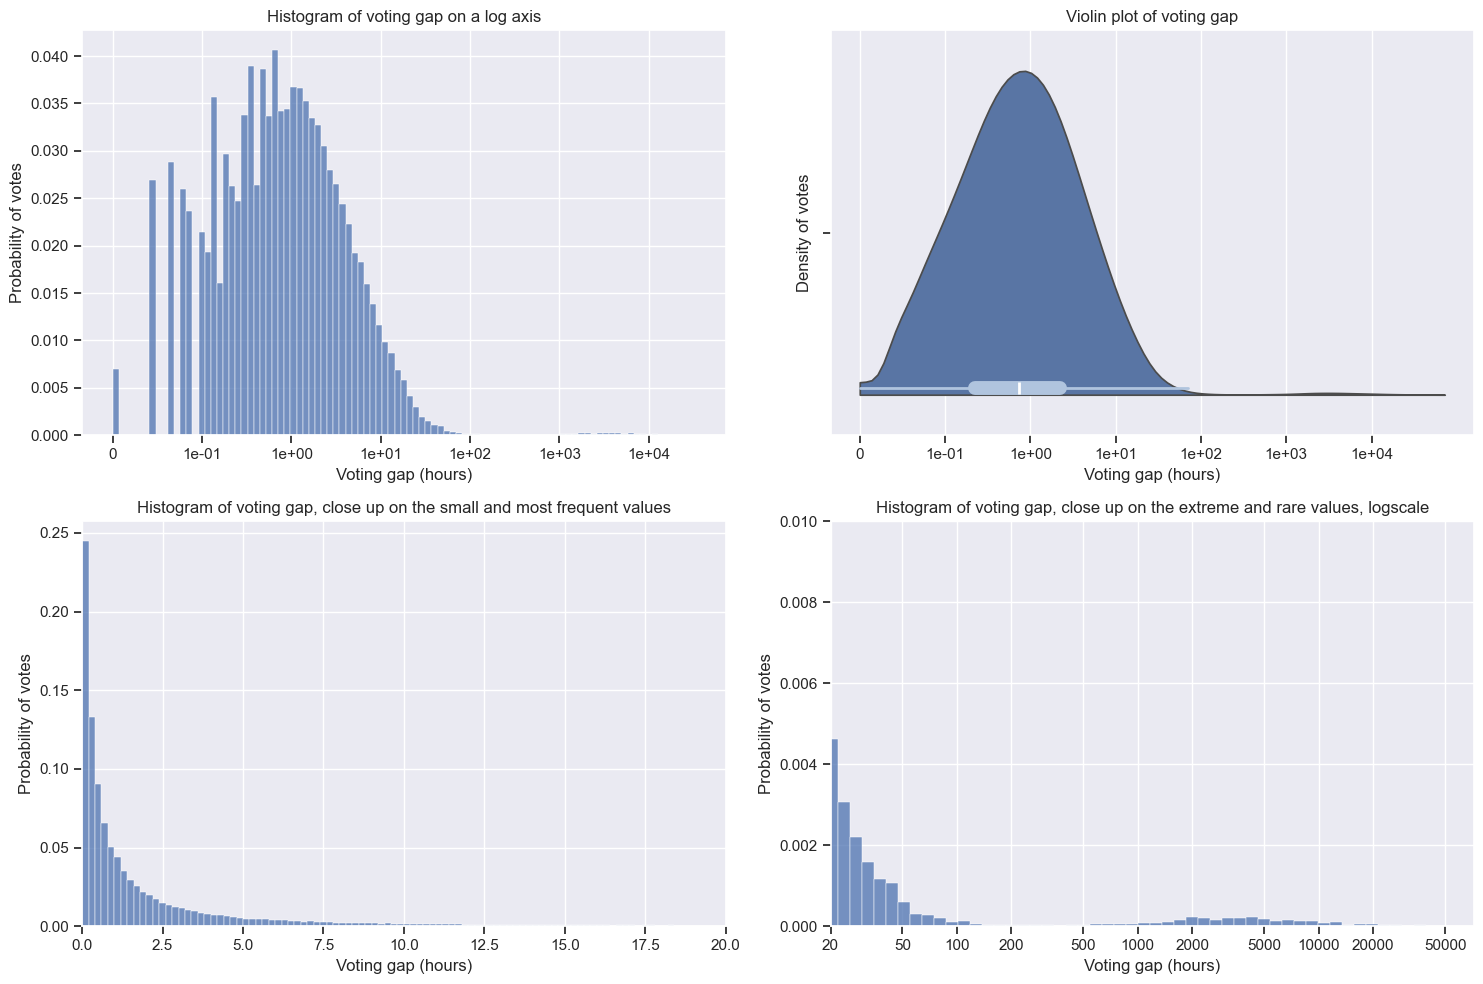

In [17]:
# Plot histogram of voting gap
fig, ax = plt.subplots(2,2, figsize=(15,10), tight_layout=True)

log_shift = 0.01
votes_gap_plot = votes_gap.dropna() + log_shift

sns.histplot(data=votes_gap_plot, ax=ax[0,0], stat='probability', bins=100, log_scale=(True, False))
ax[0,0].set_title('Histogram of voting gap on a log axis')
ax[0,0].set_xlabel('Voting gap (hours)')
ax[0,0].set_ylabel('Probability of votes')
ax[0,0].tick_params(bottom=True, left=True)
ax[0,0].set_xlim(0, np.max(votes_gap))
ticks = np.power(10, np.arange(np.log10(log_shift), np.ceil(np.log10(np.max(votes_gap_plot))), 1))
labels = [f'{tick:.0e}' for tick in ticks]
labels[0] = '0'
ax[0,0].set_xticks(ticks, labels=labels)

# Violin plot of voting gap
sns.violinplot(data=votes_gap_plot, ax=ax[0,1], orient='h', bw=0.2, cut=0, log_scale=(True, False), split=True, inner_kws=dict(box_width=10, whis_width=2, color="lightsteelblue"))
ax[0,1].set_title('Violin plot of voting gap')
ax[0,1].set_xlabel('Voting gap (hours)')
ax[0,1].set_ylabel('Density of votes')
ax[0,1].tick_params(bottom=True, left=True)
ax[0,1].set_xticks(ticks, labels=labels)

sns.histplot(data=votes_gap, ax=ax[1,0], stat='probability', bins=100, binrange=(0,20))
ax[1,0].set_title('Histogram of voting gap, close up on the small and most frequent values')
ax[1,0].set_xlabel('Voting gap (hours)')
ax[1,0].set_ylabel('Probability of votes')
ax[1,0].set_xlim(0, 20)
ax[1,0].tick_params(bottom=True, left=True)


sns.histplot(data=votes_gap, ax=ax[1,1], stat='probability', bins=100, log_scale=(True, False))
ax[1,1].set_title('Histogram of voting gap, close up on the extreme and rare values, logscale')
ax[1,1].set_xlabel('Voting gap (hours)')
ax[1,1].set_ylabel('Probability of votes')
ax[1,1].set_xlim(20, np.max(votes_gap))
ax[1,1].set_ylim(0, 0.01)
ax[1,1].set_xticks([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000], labels=['20', '50', '100', '200', '500', '1000', '2000', '5000', '10000', '20000', '50000']) 
ax[1,1].tick_params(bottom=True, left=True)

plt.show()

In [18]:
# Extract the voting gap correspong to less than 1% of the voting gap
votes_gap[votes_gap >= votes_gap.quantile(0.99)].min()

26.900000000000006

We can see that the distribution of the time interval between votes almost follows an exponential distribution (which is what we would expect for this type of data). However, we can see that there is an additional very small peak between 1000 and 20000 hours, which reveals the presence of multiple batches/aggregate of votes separated by a long period of time. We interpret this as different rounds of elections. Indeed, some target are not elected at the first try and they run for admin again after a certain period of time. We now want to separate the data into different rounds of elections for each target.

### Separate data into rounds of elections

In [19]:
from sklearn.neighbors import KernelDensity

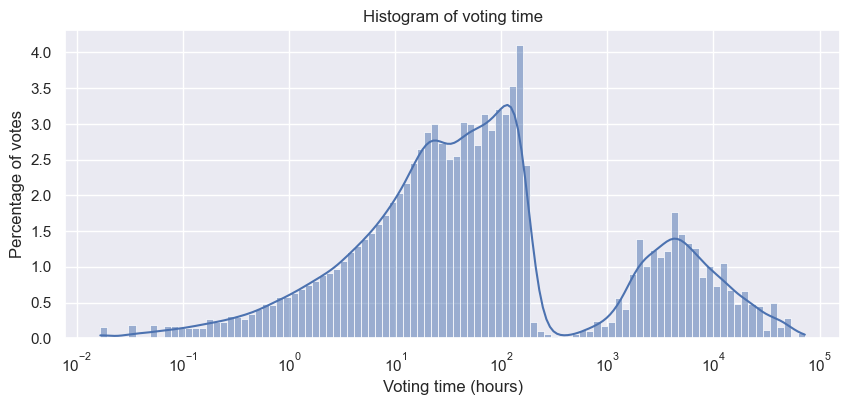

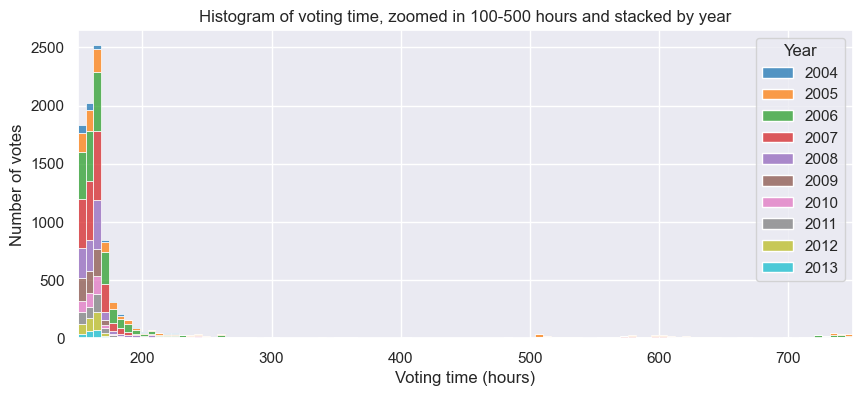

After this threshold in hours, we consider that the incoming votes are part of a new election: 391.11 hours
Percentage of votes happening at this threshold: 4.1%


In [20]:
fig, ax = plt.subplots(figsize=(10,4))
kde = sns.histplot(data=df_plot, x='Voting_time', kde=True, ax=ax, bins=100, stat='percent', log_scale=(True, False))
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

# Close up the voting time to 100-500 hours
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(data=df_plot, x='Voting_time', ax=ax, bins=100, stat='count', log_scale=(False, False), binrange=(150, 750), hue='Year', palette='tab10', multiple='stack')
ax.set_title('Histogram of voting time, zoomed in 100-500 hours and stacked by year')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Number of votes')
ax.set_xlim(150, 750)
plt.show()

# Find the local minima
kde = kde.get_lines()[0].get_data()
deriv_kde_sign = np.sign(np.diff(kde[1]))
local_mins = kde[0][np.append((np.roll(deriv_kde_sign, 1) - deriv_kde_sign) != 0, False)]
y_mins = kde[1][np.append((np.roll(deriv_kde_sign, 1) - deriv_kde_sign) != 0, False)]

# only keep the minima with a y value < 0.1 and a x value is between 10 and 1e4
round_threshold = local_mins[(y_mins < 0.5) & (local_mins > 10) & (local_mins < 1e4)][0]
percent_at_threshold = y_mins[(y_mins < 0.5) & (local_mins > 10) & (local_mins < 1e4)][0]*100

print(f'After this threshold in hours, we consider that the incoming votes are part of a new election: {round_threshold:.2f} hours')
print(f'Percentage of votes happening at this threshold: {percent_at_threshold:.2}%')

In [21]:
lower_bound = 100
upper_bound = 1000
log_voting_time = np.log10(voting_time[(voting_time > lower_bound) & (voting_time < upper_bound)])
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(log_voting_time.values.reshape(-1, 1))
kde_x = np.linspace(np.min(log_voting_time), np.max(log_voting_time), 1000)
kde_y = np.exp(kde.score_samples(kde_x.reshape(-1, 1)))
deriv_kde_sign = np.sign(np.diff(kde_y))
local_mins = kde_x[np.append((np.roll(deriv_kde_sign, 1) - deriv_kde_sign) != 0, False)]
y_mins = kde_y[np.append((np.roll(deriv_kde_sign, 1) - deriv_kde_sign) != 0, False)]
round_threshold = local_mins[(y_mins < 0.1)][0]
percent_at_threshold = y_mins[(y_mins < 0.1)][0]
print(f'Local minima of the voting time distribution: {10**round_threshold:.2f} hours')
print(f'Percentage of votes happening at this threshold: {percent_at_threshold:.2}%')

Local minima of the voting time distribution: 386.84 hours
Percentage of votes happening at this threshold: 0.036%


To separate the different rounds of elections we focus on the gap between the 2 peaks in the distribution of voting time. First, we can observe that there is a huge drop in the amount of votes at around 170h which is consistent with the information we found on the Wikipedia page about the election duration being approximately 7 days (noting that this period can be prolonged in some cases). 
To find the best threshold to separate the data, we extracted the kernel density estimation of the distribution of voting time and we computed its local minimum in the gap between the 2 peaks and the corresponding voting time. We found that the best threshold to separate the data is 391h. We can now separate the data into different rounds of elections for each target using this threshold.

In [22]:
# Start a new round each time the interval between the current voting and the first voting time of the round is greater than the round threshold
def compute_rounds(data, round_threshold):
    data = data.sort_values('Voting_time')
    voting_time = data.Voting_time.values
    rounds = np.array([1])
    for i in range(1,len(voting_time)):
        # If the candidate is elected, we stop the round but check if there is no other vote after more than 4 month (what we consider as a new election for a candidate that may have lost its admin rights)
        if data.Results.values[i] == 1 and voting_time.max()-voting_time[i] < 24*30*4:
            round_number = rounds[-1] + (voting_time[i] > round_threshold)
            rounds = np.append(rounds, round_number*np.ones(len(voting_time)-i).astype(int))
            break
        elif (voting_time[i] > round_threshold and data.Results.values[i] != 1 and voting_time[i]-voting_time[i-1]>=24) or \
            (data.Results.values[i] == 1 and (voting_time[i] > 24*30*4 or data.Results.values[i-1] != 1)):
            rounds = np.append(rounds, rounds[-1] + 1)
            voting_time = voting_time - voting_time[i]
        elif len(rounds) > 1 and rounds[-2] != rounds[-1]:
            rounds = np.append(rounds, rounds[-1])
            voting_time = voting_time - voting_time[i]
        else:
            rounds = np.append(rounds, rounds[-1])
            
    rounds = pd.Series(rounds, index=data.index).astype(int)
    return rounds

rounds = (df_timeserie.groupby('Target').apply(lambda x: compute_rounds(x, round_threshold))).rename('Round')
df_timeserie = df_timeserie.join(rounds.droplevel(0))
df_timeserie

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,0.000000,1
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1.850000,1
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,0.500000,1
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,0.966667,1
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1.716667,1
...,...,...,...,...,...,...,...,...,...
198066,Lst27,Yelyos,-1,-1,2004,2004-11-16 23:57:00,Support after 1200 edits. --,47.300000,1
198068,Wolfman,Yelyos,-1,-1,2004,2004-11-19 16:05:00,Would support after a bit more editing work,111.433333,2
198069,Tuomas,Yelyos,-1,-1,2004,2004-11-20 15:24:00,The exact number of edits ought to be no obsta...,134.750000,2
198070,Improv,Yelyos,-1,-1,2004,2004-11-20 19:51:00,Not enough edits. Edits are ''necessary but no...,139.200000,2


### Update the voting time given the rounds of elections

In [23]:
# Use the round number to compute the voting time in each round (i.e. the time between the current vote and the first vote of the round)
Voting_time_round = df_timeserie.groupby(['Target', 'Round']).Voting_time.apply(lambda x: x - x.min())
# Replace the column Voting_time by the voting time in each round
df_timeserie = df_timeserie.drop(columns='Voting_time').join(Voting_time_round.droplevel([0,1]))
df_plot = df_timeserie[df_timeserie.Voting_time != 0]
df_timeserie

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,1,0.000000
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1,1.850000
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,1,0.500000
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,1,0.966667
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1,1.716667
...,...,...,...,...,...,...,...,...,...
198066,Lst27,Yelyos,-1,-1,2004,2004-11-16 23:57:00,Support after 1200 edits. --,1,47.300000
198068,Wolfman,Yelyos,-1,-1,2004,2004-11-19 16:05:00,Would support after a bit more editing work,2,38.933333
198069,Tuomas,Yelyos,-1,-1,2004,2004-11-20 15:24:00,The exact number of edits ought to be no obsta...,2,62.250000
198070,Improv,Yelyos,-1,-1,2004,2004-11-20 19:51:00,Not enough edits. Edits are ''necessary but no...,2,66.700000


In [25]:
df_timeserie['Voting_time'].describe()

count    187868.000000
mean         44.607659
std          51.312817
min           0.000000
25%           6.000000
50%          23.250000
75%          69.466667
max        1562.466667
Name: Voting_time, dtype: float64

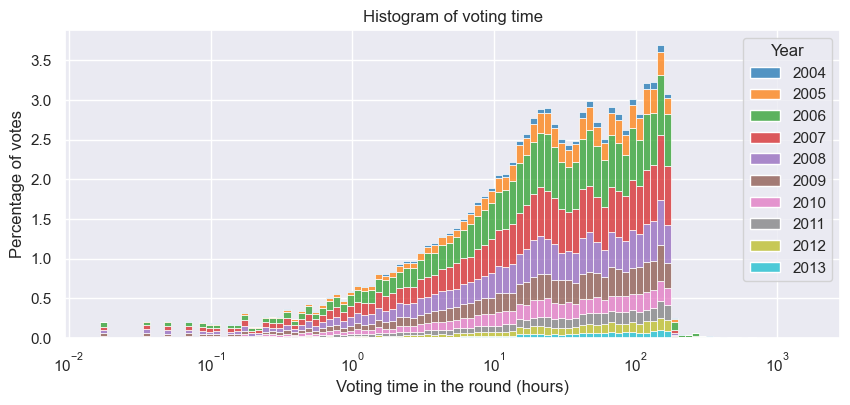

In [26]:
fig, ax = plt.subplots(figsize=(10,4))
kde = sns.histplot(data=df_plot, x='Voting_time', ax=ax, bins=100, stat='percent', log_scale=(True, False), hue='Year', palette='tab10', multiple='stack')
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time in the round (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

The resulting rounds of elections we get using this method and threshold enable 

In [27]:
df_timeserie.to_csv('wiki-RfA_timeserie.csv')

## Vote evolution through time

In [28]:
df_vote_evolution = df_timeserie.copy()
# Compute the progressive mean of the votes in each round (i.e. the mean of the votes at each time step)
progressive_mean = df_vote_evolution.groupby(['Target', 'Round']).apply(lambda x: x.Vote.cumsum() / np.arange(1, len(x)+1)).rename('progressive_mean')
# Replace the column Vote by the progressive mean
df_vote_evolution = df_vote_evolution.join(progressive_mean.droplevel([0,1]))
df_vote_evolution

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,progressive_mean
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,1,0.000000,1.000000
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1,1.850000,1.000000
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,1,0.500000,1.000000
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,1,0.966667,1.000000
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1,1.716667,1.000000
...,...,...,...,...,...,...,...,...,...,...
198066,Lst27,Yelyos,-1,-1,2004,2004-11-16 23:57:00,Support after 1200 edits. --,1,47.300000,0.090909
198068,Wolfman,Yelyos,-1,-1,2004,2004-11-19 16:05:00,Would support after a bit more editing work,2,38.933333,0.500000
198069,Tuomas,Yelyos,-1,-1,2004,2004-11-20 15:24:00,The exact number of edits ought to be no obsta...,2,62.250000,0.200000
198070,Improv,Yelyos,-1,-1,2004,2004-11-20 19:51:00,Not enough edits. Edits are ''necessary but no...,2,66.700000,0.000000


In [29]:
#Convert in timedelta
df_vote_evolution.Voting_time = pd.to_timedelta(df_vote_evolution.Voting_time, unit='h')
df_vote_evolution.sort_values('Voting_time', inplace=True)
display(df_vote_evolution)
rolling_avg = df_vote_evolution.groupby('Results').rolling('1h', on='Voting_time').progressive_mean.aggregate(['mean', 'std']).reset_index(level='Voting_time')
rolling_avg.Voting_time = rolling_avg.Voting_time.dt.total_seconds()/3600
display(rolling_avg)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,progressive_mean
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,1,0 days 00:00:00,1.0
115406,BigDT,Ferrett3,-1,-1,2007,2007-02-19 03:19:00,'''Suggest withdrawal''' - most admins have th...,1,0 days 00:00:00,-1.0
48617,Youngamerican,Jerem43,1,-1,2009,2009-07-17 11:23:00,'''Support''' as nom.,1,0 days 00:00:00,1.0
115391,U.S.A.U.S.A.U.S.A.,FastLizard4,1,-1,2007,2007-11-10 05:35:00,--,1,0 days 00:00:00,1.0
115324,Stangbat,Fan-1967,1,-1,2007,2007-01-26 02:50:00,'''Support''' per nom. I first encountered Fan...,1,0 days 00:00:00,1.0
...,...,...,...,...,...,...,...,...,...,...
105809,StuffOfInterest,SchuminWeb,1,1,2007,2007-06-11 16:32:00,'''Support'''. Would prefer to see a little l...,2,33 days 00:09:00,1.0
105810,Blnguyen,SchuminWeb,1,1,2007,2007-06-12 00:26:00,'''Support''' - good contributor. ''',2,33 days 08:03:00,1.0
105811,Captain panda,SchuminWeb,1,1,2007,2007-06-12 01:17:00,'''Support''' A good one to have the tools.,2,33 days 08:54:00,1.0
105812,Vision Thing,SchuminWeb,1,1,2007,2007-06-12 19:23:00,'''Support''' I had some doubts on his last Rf...,2,34 days 03:00:00,1.0


,Voting_time,mean,std
Results,,,
-1,0.000000,-1.000000,NaN
-1,0.000000,0.000000,1.414214
-1,0.000000,0.333333,1.154701
-1,0.000000,0.500000,1.000000
-1,0.000000,0.200000,1.095445
...,...,...,...
1,792.150000,1.000000,NaN
1,800.050000,1.000000,NaN
1,800.900000,1.000000,0.000000


In [30]:
rolling_avg.loc[-1].Voting_time

Results
-1      0.000000
-1      0.000000
-1      0.000000
-1      0.000000
-1      0.000000
         ...    
-1    232.066667
-1    232.600000
-1    242.600000
-1    246.666667
-1    247.216667
Name: Voting_time, Length: 71299, dtype: float64

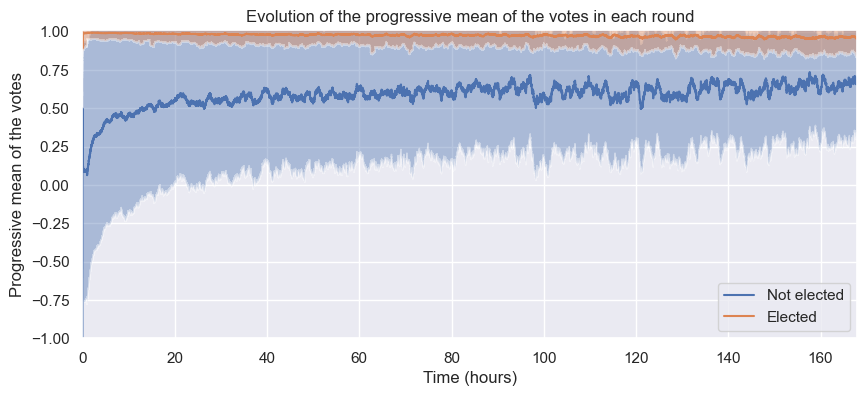

In [31]:
# Plot the evolution of the progressive mean of the votes in each round given rolling average
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(rolling_avg.loc[-1].Voting_time, rolling_avg.loc[-1]['mean'], label='Not elected')
ax.fill_between(rolling_avg.loc[-1].Voting_time, rolling_avg.loc[-1]['mean']-rolling_avg.loc[-1]['std'], rolling_avg.loc[-1]['mean']+rolling_avg.loc[-1]['std'], alpha=0.4)
ax.plot(rolling_avg.loc[1].Voting_time, rolling_avg.loc[1]['mean'], label='Elected')
ax.fill_between(rolling_avg.loc[1].Voting_time, rolling_avg.loc[1]['mean']-rolling_avg.loc[1]['std'], rolling_avg.loc[1]['mean']+rolling_avg.loc[1]['std'], alpha=0.4)
ax.set_title('Evolution of the progressive mean of the votes in each round')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Progressive mean of the votes')
ax.set_xlim(0, 24*7)
ax.set_ylim(-1, 1.01)
ax.legend(loc='lower right')
plt.show()    

In [ ]:
df_vote_evolution.groupby('Results')[['progressive_mean']].agg(['mean', 'std'])

progressive_mean          
                    mean       std
Results                           
-1              0.454460  0.636774
 1              0.982224  0.074236

AttributeError: PathCollection.set() got an unexpected keyword argument 'hue'

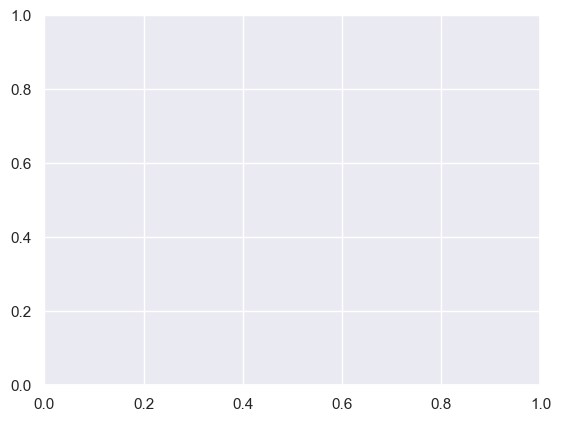

In [ ]:
# Plot the evolution of 'Vote' over 'Voting_time' by averaging over the positive and negative results
# Plot the progressive average of the vote over time
df_vote_evolution.plot(kind='scatter', x='Voting_time', y='progressive_mean', subplots=False, alpha=1, hue='Results')
sns.
plt.title('Evolution of the vote over time')
plt.xlabel('Voting time (min)')
plt.ylabel('Vote')
plt.xlim(0,600)
plt.show()

KeyboardInterrupt: 

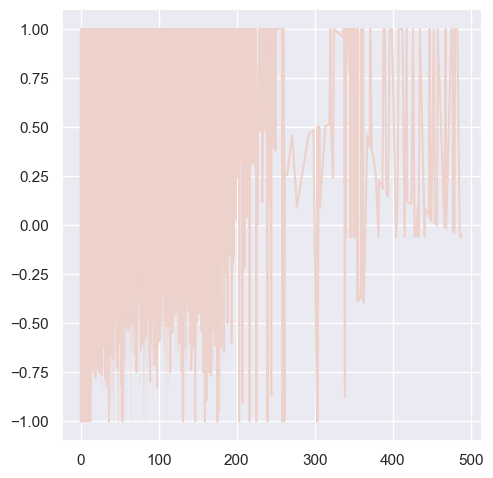

In [ ]:
#sns.relplot(data=df_vote_evolution, x="Voting_time", y="progressive_mean", hue='Results', kind="line")

In [ ]:
# Compute moving average of progressive mean
#df_vote_evolution.groupby('Results').aggregate()